In [1]:
# Regressão Linear: Exemplo Completo com Explicações
# ================================================

# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [2]:
# Configurando o estilo dos gráficos
plt.style.use('seaborn-v0_8')
np.random.seed(42)  # Para reproduzibilidade dos resultados

In [3]:
# 1. CRIANDO DADOS DE EXEMPLO
# ===========================

# Vamos criar um dataset simulando a relação entre horas de estudo e notas
print("EXEMPLO: Relação entre Horas de Estudo e Nota Final")
print("=" * 60)

# Gerando dados simulados
n_estudantes = 50
horas_estudo = np.random.uniform(1, 10, n_estudantes)  # 1 a 10 horas de estudo

# Criando uma relação linear com ruído
# Nota = 5 + 2 * horas_estudo + ruído
nota_base = 5 + 2 * horas_estudo  # Relação linear perfeita
ruido = np.random.normal(0, 1.5, n_estudantes)  # Adicionando ruído realista
nota_final = nota_base + ruido

# Garantindo que as notas estejam entre 0 e 10
nota_final = np.clip(nota_final, 0, 10)

# Criando DataFrame para melhor visualização
dados = pd.DataFrame({
    'horas_estudo': horas_estudo,
    'nota_final': nota_final
})

print(f"Dataset criado com {n_estudantes} estudantes")
print("\nPrimeiras 5 observações:")
print(dados.head())

print(f"\nEstatísticas descritivas:")
print(dados.describe().round(2))

EXEMPLO: Relação entre Horas de Estudo e Nota Final
Dataset criado com 50 estudantes

Primeiras 5 observações:
   horas_estudo  nota_final
0      4.370861   10.000000
1      9.556429   10.000000
2      7.587945   10.000000
3      6.387926   10.000000
4      2.404168    7.590553

Estatísticas descritivas:
       horas_estudo  nota_final
count         50.00       50.00
mean           5.01        9.66
std            2.60        0.80
min            1.19        6.87
25%            2.65       10.00
50%            4.92       10.00
75%            6.85       10.00
max            9.73       10.00


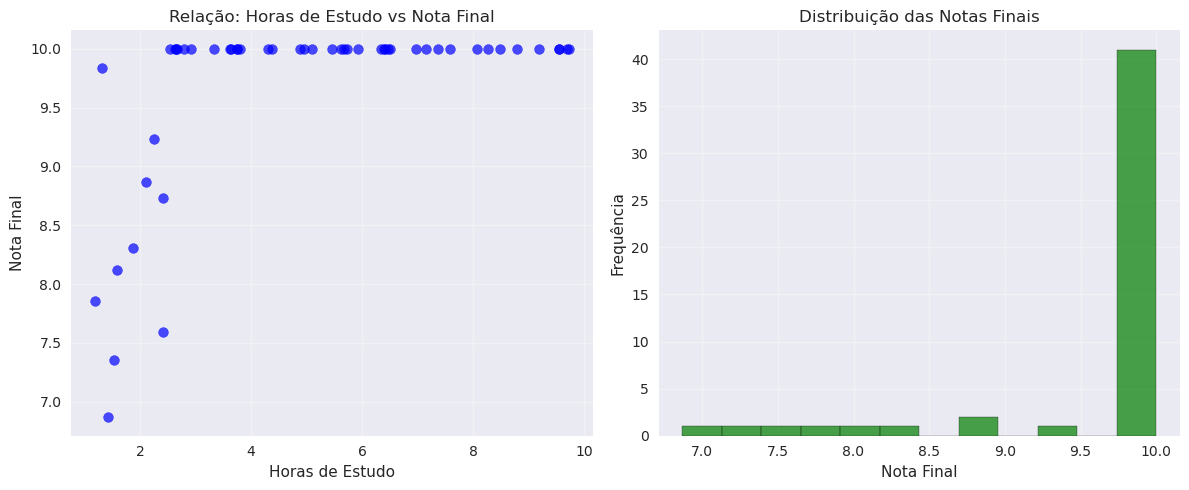

In [4]:
# 2. VISUALIZAÇÃO INICIAL DOS DADOS
# =================================

plt.figure(figsize=(12, 5))

# Gráfico de dispersão
plt.subplot(1, 2, 1)
plt.scatter(dados['horas_estudo'], dados['nota_final'], alpha=0.7, color='blue', s=50)
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota Final')
plt.title('Relação: Horas de Estudo vs Nota Final')
plt.grid(True, alpha=0.3)

# Histograma das notas
plt.subplot(1, 2, 2)
plt.hist(dados['nota_final'], bins=12, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Nota Final')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas Finais')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
# 3. IMPLEMENTANDO REGRESSÃO LINEAR
# =================================

print("\nIMPLEMENTANDO REGRESSÃO LINEAR")
print("=" * 40)

# Preparando os dados (sklearn espera formato específico)
X = dados[['horas_estudo']]  # Variável independente (precisa ser 2D)
y = dados['nota_final']      # Variável dependente

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Fazendo predições
y_pred = modelo.predict(X)

# Extraindo parâmetros do modelo
intercepto = modelo.intercept_
inclinacao = modelo.coef_[0]

print(f"Equação da reta: y = {inclinacao:.3f}x + {intercepto:.3f}")
print(f"Interpretação:")
print(f"   Intercepto ({intercepto:.3f}): Nota esperada com 0 horas de estudo")
print(f"   Inclinação ({inclinacao:.3f}): Aumento na nota para cada hora adicional de estudo")


IMPLEMENTANDO REGRESSÃO LINEAR
Equação da reta: y = 0.169x + 8.806
Interpretação:
   Intercepto (8.806): Nota esperada com 0 horas de estudo
   Inclinação (0.169): Aumento na nota para cada hora adicional de estudo


In [6]:
# 4. CALCULANDO MÉTRICAS DE QUALIDADE
# ===================================

print(f"\nMÉTRICAS DE QUALIDADE DO MODELO")
print("=" * 40)

# R-quadrado (coeficiente de determinação)
r2 = r2_score(y, y_pred)
print(f"R² (R-quadrado): {r2:.4f}")
print(f"   Interpretação: O modelo explica {r2*100:.1f}% da variação nas notas")

# Erro quadrático médio
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Erro Quadrático Médio): {rmse:.3f}")
print(f"   Interpretação: Em média, as predições erram por ±{rmse:.2f} pontos")

# Calculando R² manualmente para demonstrar a fórmula
sse = np.sum((y - y_pred) ** 2)  # Soma dos erros quadráticos
sst = np.sum((y - np.mean(y)) ** 2)  # Soma total dos quadrados
r2_manual = 1 - (sse / sst)

print(f"\nCÁLCULO MANUAL DO R²:")
print(f"   SSE (Soma dos Erros Quadráticos): {sse:.3f}")
print(f"   SST (Soma Total dos Quadrados): {sst:.3f}")
print(f"   R² = 1 - (SSE/SST) = 1 - ({sse:.3f}/{sst:.3f}) = {r2_manual:.4f}")



MÉTRICAS DE QUALIDADE DO MODELO
R² (R-quadrado): 0.3045
   Interpretação: O modelo explica 30.5% da variação nas notas
RMSE (Erro Quadrático Médio): 0.659
   Interpretação: Em média, as predições erram por ±0.66 pontos

CÁLCULO MANUAL DO R²:
   SSE (Soma dos Erros Quadráticos): 21.684
   SST (Soma Total dos Quadrados): 31.180
   R² = 1 - (SSE/SST) = 1 - (21.684/31.180) = 0.3045


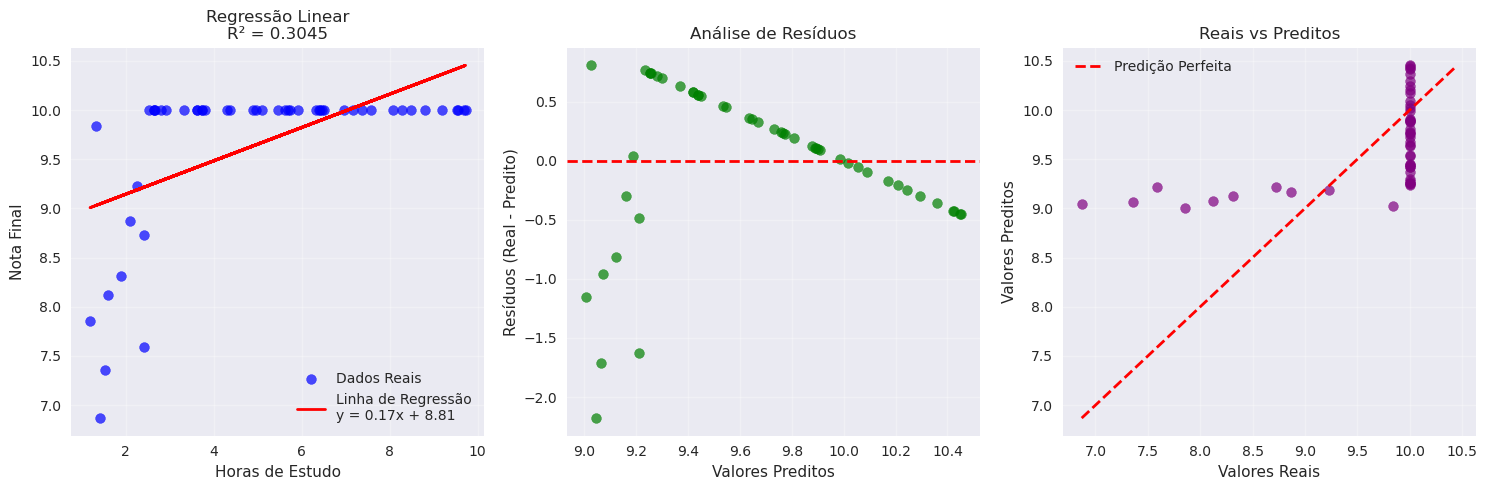

In [7]:
# 5. VISUALIZANDO OS RESULTADOS
# =============================

plt.figure(figsize=(15, 5))

# Gráfico 1: Dados originais com linha de regressão
plt.subplot(1, 3, 1)
plt.scatter(X, y, alpha=0.7, color='blue', label='Dados Reais', s=50)
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Linha de Regressão\ny = {inclinacao:.2f}x + {intercepto:.2f}')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota Final')
plt.title(f'Regressão Linear\nR² = {r2:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Resíduos (diferenças entre valores reais e preditos)
residuos = y - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuos, alpha=0.7, color='green', s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos (Real - Predito)')
plt.title('Análise de Resíduos')
plt.grid(True, alpha=0.3)

# Gráfico 3: Valores reais vs preditos
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred, alpha=0.7, color='purple', s=50)
# Linha de referência perfeita (y = x)
min_val, max_val = min(min(y), min(y_pred)), max(max(y), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predição Perfeita')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Reais vs Preditos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# 6. FAZENDO PREDIÇÕES PARA NOVOS VALORES
# =======================================

print(f"\nFAZENDO PREDIÇÕES PARA NOVOS VALORES")
print("=" * 45)

# Testando com diferentes horas de estudo
horas_teste = [2, 5, 8]
for horas in horas_teste:
    nota_predita = modelo.predict([[horas]])[0]
    print(f"{horas} horas de estudo → Nota predita: {nota_predita:.2f}")



FAZENDO PREDIÇÕES PARA NOVOS VALORES
2 horas de estudo → Nota predita: 9.15
5 horas de estudo → Nota predita: 9.65
8 horas de estudo → Nota predita: 10.16


/home/ronyus/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ronyus/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ronyus/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# 7. COMPARANDO COM MÉTODO DOS MÍNIMOS QUADRADOS MANUAL
# ====================================================

print(f"\nCOMPARANDO COM CÁLCULO MANUAL (MÍNIMOS QUADRADOS)")
print("=" * 60)

# Fórmulas dos mínimos quadrados
x_mean = np.mean(horas_estudo)
y_mean = np.mean(nota_final)

# Inclinação: b = Σ((x-x̄)(y-ȳ)) / Σ((x-x̄)²)
numerador = np.sum((horas_estudo - x_mean) * (nota_final - y_mean))
denominador = np.sum((horas_estudo - x_mean) ** 2)
inclinacao_manual = numerador / denominador

# Intercepto: a = ȳ - b*x̄
intercepto_manual = y_mean - inclinacao_manual * x_mean

print(f"Sklearn:  y = {inclinacao:.4f}x + {intercepto:.4f}")
print(f"Manual:   y = {inclinacao_manual:.4f}x + {intercepto_manual:.4f}")
print(f"Diferença praticamente zero - métodos equivalentes!")



COMPARANDO COM CÁLCULO MANUAL (MÍNIMOS QUADRADOS)
Sklearn:  y = 0.1693x + 8.8064
Manual:   y = 0.1693x + 8.8064
Diferença praticamente zero - métodos equivalentes!
